# Part 02: Doing some research (billionaires)

Answer your own selection out of the following questions, or any other questions you might be able to think of.  Write the question down first in a markdown cell (use a # to make the question a nice header), THEN try to get an answer to it. A lot of these are remarkably similar, and some you'll need to do manual work for - the GDP ones, for example.

If you are trying to figure out some other question that we didn't cover in class and it does not have to do with joining to another data set, we're happy to help you figure it out during lab!

* Take a peek at the billionaires notebook I uploaded into Slack, it should be helpful for the graphs (I added a few other styles and options, too). You'll probably also want to look at the "sum()" line I added.
* What country are most billionaires from? For the top ones, how many billionaires per billion people?
* Who are the top 10 richest billionaires?
* What's the average wealth of a billionaire? Male? Female?
* Who is the poorest billionaire? Who are the top 10 poorest billionaires?
* 'What is relationship to company'? And what are the most common relationships?
* Most common source of wealth? Male vs. female?
* Given the richest person in a country, what % of the GDP is their wealth?
* Add up the wealth of all of the billionaires in a given country (or a few countries) and then compare it to the GDP of the country, or other billionaires, so like pit the US vs India
* What are the most common industries for billionaires to come from? What's the total amount of billionaire money from each industry?
* How many self made billionaires vs. others?
* How old are billionaires? How old are billionaires self made vs. non self made? or different industries?
* Who are the youngest billionaires? The oldest? Age distribution - maybe make a graph about it?
* Maybe just made a graph about how wealthy they are in general?
* Maybe plot their net worth vs age (scatterplot)
* Make a bar graph of the top 10 or 20 richest


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("richpeople.xlsx")
df.head()
# We only want towork with the ones from 2014
recent = df[df['year'] == 2014]
recent.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
5,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
6,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
8,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
9,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


* What country are most billionaires from? For the top ones, how many billionaires per billion people?
* Who are the top 10 richest billionaires?
* What's the average wealth of a billionaire? Male? Female?
* Who is the poorest billionaire? Who are the top 10 poorest billionaires?

In [3]:
recent.columns.values

array(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance',
       'sector', 'company', 'companytype', 'relationshiptocompany',
       'foundingdate', 'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2',
       'source', 'source_2', 'source_3', 'source_4'], dtype=object)

In [4]:
# Where are they from?
recent['countrycode'].value_counts()

USA       499
CHN       152
RUS       111
DEU        85
BRA        65
IND        56
GBR        47
HKG        45
FRA        43
ITA        35
CAN        32
AUS        29
Taiwan     28
JPN        27
KOR        27
ESP        26
TUR        24
CHE        22
SWE        19
IDN        19
ISR        18
SGP        16
MEX        16
MYS        13
CHL        12
THA        11
AUT        10
PHL        10
UKR         9
NOR         9
         ... 
KWT         5
ARG         5
IRL         5
FIN         5
KAZ         5
CYP         4
NGA         4
MAR         4
ARE         4
COL         4
MCO         3
BEL         3
VEN         3
PRT         3
GRC         3
OMN         2
MAC         2
NZL         2
TZA         1
LTU         1
GGY         1
VNM         1
GEO         1
AGO         1
KNA         1
DZA         1
SWZ         1
UGA         1
ROU         1
NPL         1
Name: countrycode, dtype: int64

In [5]:
recent.sort_values(by='networthusbillion', ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
284,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
348,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
124,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
2491,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
1377,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
509,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
381,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
2185,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
429,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
1128,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


In [6]:
# * Who is the poorest billionaire? Who are the top 10 poorest billionaires?
recent.sort_values(by='rank',ascending=False).head(3)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1971,2014,Richard Chang,1565,Taiwan,Taiwan,1.0,self-made,self-made finance,male,67.0,...,founder,1984.0,NaN,"real estate, electronics",NaN,NaN,http://www.forbes.com/profile/richard-chang-1/,http://www.aseglobal.com/en/About/Milestones.asp,NaN,NaN
1834,2014,Pavel Tykac,1565,Czech Republic,CZE,1.0,self-made,privatized and resources,male,49.0,...,investor,1995.0,NaN,coal mine,took advantage of Czech Republics privitizatio...,NaN,http://www.forbes.com/profile/pavel-tykac/,http://cs.wikipedia.org/wiki/Pavel_Tyka%C4%8D,NaN,NaN
2443,2014,Vivek Chaand Sehgal,1565,Australia,AUS,1.0,self-made,founder non-finance,male,57.0,...,founder,1986.0,NaN,auto parts,"Indian founder of Motherson Sumi, Australian c...",NaN,http://www.forbes.com/profile/vivek-chaand-seh...,http://en.wikipedia.org/wiki/Motherson_Sumi_Sy...,NaN,Will Vivek Sehgal’s Gambit Pay Off? Rashmi K P...


In [7]:
recent[recent['rank'] == 1565]

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
56,2014,Alberto Alcocer,1565,Spain,ESP,1.0,self-made,self-made finance,male,71.0,...,owner,1952.0,NaN,investments,married to Esther Koplowitz,NaN,http://en.wikipedia.org/wiki/Alberto_Alcocer,http://www.forbes.com/profile/alberto-alcocer/,NaN,NaN
81,2014,Alexander Vik,1565,Norway,NOR,1.0,self-made,self-made finance,male,59.0,...,investor,1980.0,NaN,investments,many business ventures have failed but still m...,NaN,http://www.forbes.com/sites/nathanvardi/2014/0...,NaN,NaN,NaN
129,2014,An Kang,1565,China,CHN,1.0,self-made,founder non-finance,male,65.0,...,founder,1992.0,NaN,pharmaceuticals,NaN,NaN,http://www.forbes.com/profile/an-kang/,http://english.hualanbio.com/enterhualan/history/,NaN,NaN
145,2014,Andrea Reimann-Ciardelli,1565,United States,USA,1.0,inherited,inherited,female,NaN,...,relation,1923.0,NaN,consumer goods,inherited from father,no involvement in company,http://www.forbes.com/profile/matthias-reimann...,NaN,NaN,NaN
164,2014,Andrew Gotianun,1565,Philippines,PHL,1.0,self-made,self-made finance,male,86.0,...,founder,1955.0,NaN,real estate,NaN,NaN,http://en.wikipedia.org/wiki/Andrew_Gotianun,http://www.forbes.com/profile/andrew-gotianun/,Second-hand car dealer discovers road to riche...,NaN
171,2014,Angela Bennett,1565,Australia,AUS,1.0,inherited,inherited,female,69.0,...,relation,1955.0,NaN,mining,inherited from father,shared fortune with brother,http://www.forbes.com/profile/angela-bennett/,NaN,NaN,NaN
178,2014,Anne Beaufour,1565,France,FRA,1.0,inherited,inherited,female,50.0,...,relation,1929.0,NaN,pharmaceuticals,3rd generation,NaN,http://en.wikipedia.org/wiki/Ipsen,http://www.ipsen.com/le-groupe/historique-du-g...,http://www.forbes.com/profile/anne-beaufour/,NaN
234,2014,B.R. Shetty,1565,India,IND,1.0,self-made,founder non-finance,male,72.0,...,founder,1975.0,NaN,healthcare,NaN,NaN,http://en.wikipedia.org/wiki/B._R._Shetty,http://www.nmchealth.com/dr-br-shetty/,NaN,NaN
261,2014,Bent Jensen,1565,Denmark,DEN,1.0,inherited,inherited,male,62.0,...,relation,1907.0,NaN,electric linear systems,3rd generation,NaN,http://www.forbes.com/profile/bent-jensen/,NaN,NaN,NaN
296,2014,Boris Mints,1565,Russia,RUS,1.0,self-made,self-made finance,male,55.0,...,owner,2010.0,NaN,real estate,NaN,NaN,http://www.forbes.com/profile/boris-mints/,http://www.o1properties.ru/o1properties/about-...,http://www.bloomberg.com/research/stocks/priva...,NaN


In [8]:
recent[recent['networthusbillion'] == 1]

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
56,2014,Alberto Alcocer,1565,Spain,ESP,1.0,self-made,self-made finance,male,71.0,...,owner,1952.0,NaN,investments,married to Esther Koplowitz,NaN,http://en.wikipedia.org/wiki/Alberto_Alcocer,http://www.forbes.com/profile/alberto-alcocer/,NaN,NaN
81,2014,Alexander Vik,1565,Norway,NOR,1.0,self-made,self-made finance,male,59.0,...,investor,1980.0,NaN,investments,many business ventures have failed but still m...,NaN,http://www.forbes.com/sites/nathanvardi/2014/0...,NaN,NaN,NaN
129,2014,An Kang,1565,China,CHN,1.0,self-made,founder non-finance,male,65.0,...,founder,1992.0,NaN,pharmaceuticals,NaN,NaN,http://www.forbes.com/profile/an-kang/,http://english.hualanbio.com/enterhualan/history/,NaN,NaN
145,2014,Andrea Reimann-Ciardelli,1565,United States,USA,1.0,inherited,inherited,female,NaN,...,relation,1923.0,NaN,consumer goods,inherited from father,no involvement in company,http://www.forbes.com/profile/matthias-reimann...,NaN,NaN,NaN
164,2014,Andrew Gotianun,1565,Philippines,PHL,1.0,self-made,self-made finance,male,86.0,...,founder,1955.0,NaN,real estate,NaN,NaN,http://en.wikipedia.org/wiki/Andrew_Gotianun,http://www.forbes.com/profile/andrew-gotianun/,Second-hand car dealer discovers road to riche...,NaN
171,2014,Angela Bennett,1565,Australia,AUS,1.0,inherited,inherited,female,69.0,...,relation,1955.0,NaN,mining,inherited from father,shared fortune with brother,http://www.forbes.com/profile/angela-bennett/,NaN,NaN,NaN
178,2014,Anne Beaufour,1565,France,FRA,1.0,inherited,inherited,female,50.0,...,relation,1929.0,NaN,pharmaceuticals,3rd generation,NaN,http://en.wikipedia.org/wiki/Ipsen,http://www.ipsen.com/le-groupe/historique-du-g...,http://www.forbes.com/profile/anne-beaufour/,NaN
234,2014,B.R. Shetty,1565,India,IND,1.0,self-made,founder non-finance,male,72.0,...,founder,1975.0,NaN,healthcare,NaN,NaN,http://en.wikipedia.org/wiki/B._R._Shetty,http://www.nmchealth.com/dr-br-shetty/,NaN,NaN
261,2014,Bent Jensen,1565,Denmark,DEN,1.0,inherited,inherited,male,62.0,...,relation,1907.0,NaN,electric linear systems,3rd generation,NaN,http://www.forbes.com/profile/bent-jensen/,NaN,NaN,NaN
296,2014,Boris Mints,1565,Russia,RUS,1.0,self-made,self-made finance,male,55.0,...,owner,2010.0,NaN,real estate,NaN,NaN,http://www.forbes.com/profile/boris-mints/,http://www.o1properties.ru/o1properties/about-...,http://www.bloomberg.com/research/stocks/priva...,NaN


In [9]:
recent['networthusbillion'].describe()

count    1653.000000
mean        3.904658
std         5.748520
min         1.000000
25%         1.400000
50%         2.100000
75%         3.700000
max        76.000000
Name: networthusbillion, dtype: float64

In [10]:
recent.groupby("gender")['networthusbillion'].describe()

gender       
female  count     180.000000
        mean        3.920556
        std         5.312604
        min         1.000000
        25%         1.400000
        50%         2.300000
        75%         3.700000
        max        36.700000
male    count    1473.000000
        mean        3.902716
        std         5.801227
        min         1.000000
        25%         1.400000
        50%         2.100000
        75%         3.700000
        max        76.000000
Name: networthusbillion, dtype: float64

In [11]:
# * Add up the wealth of all of the billionaires in a 
# given country (or a few countries) and then 
# compare it to the GDP of the country, or other billionaires, 
# so like pit the US vs India
recent.groupby('countrycode')['networthusbillion'].sum().sort_values(ascending=False)

countrycode
USA       2322.4
RUS        422.5
DEU        401.4
CHN        375.8
FRA        235.3
HKG        213.7
BRA        192.2
IND        191.9
ITA        158.1
GBR        152.0
MEX        142.9
ESP        122.6
SWE        116.7
CAN        112.8
JPN        101.0
AUS         85.4
CHE         80.2
Taiwan      75.8
KOR         60.7
MYS         53.1
ISR         51.8
SAU         49.0
IDN         47.8
SGP         45.1
TUR         43.2
CHL         41.3
PHL         40.1
THA         36.8
AUT         33.8
NGA         33.3
           ...  
EGY         15.6
ARE         14.6
FIN         13.3
POL         12.8
LBN         12.3
PER         11.9
ARG         11.3
PRT         10.6
NZL          9.8
KAZ          9.2
VEN          9.0
GRC          8.2
BEL          8.0
MAR          7.4
KWT          6.5
GEO          5.2
MCO          4.6
SWZ          3.7
AGO          3.7
DZA          3.2
MAC          2.8
GGY          2.4
OMN          2.3
VNM          1.6
ROU          1.2
KNA          1.2
NPL          1.1
UG

In [12]:
# * What are the most common industries for billionaires to come from?
recent['industry'].value_counts().head()

Consumer                 291
Real Estate              190
Retail, Restaurant       174
Diversified financial    132
Technology-Computer      131
Name: industry, dtype: int64

In [13]:
# What's the total amount of billionaire money from each industry?
recent.groupby('industry')['networthusbillion'].sum().sort_values(ascending=False).head()

industry
Consumer                 1177.8
Retail, Restaurant        820.9
Technology-Computer       684.6
Diversified financial     614.4
Real Estate               573.8
Name: networthusbillion, dtype: float64

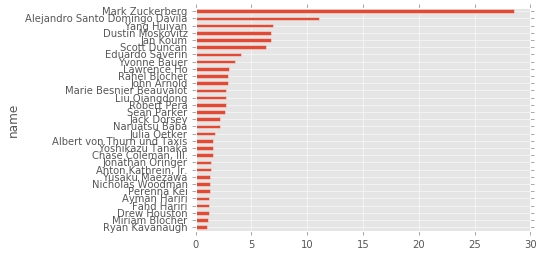

In [14]:
# Young and rich and cool : Billionaires under 40
plt.style.use("ggplot")
sorted_young_bils = recent[recent['age'] < 40].sort_values(by='networthusbillion')
sorted_young_bils.plot(kind='barh', x='name', y='networthusbillion', legend=False)

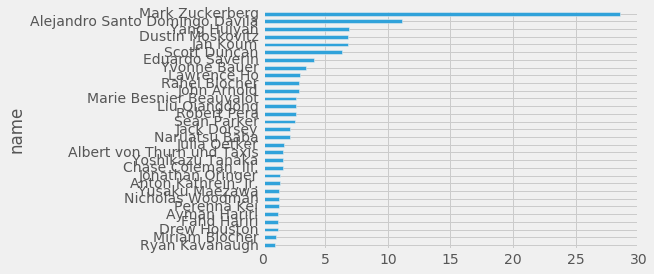

In [15]:
# Young and rich and cool : Billionaires under 40
plt.style.use("fivethirtyeight")
sorted_young_bils = recent[recent['age'] < 40].sort_values(by='networthusbillion')
sorted_young_bils.plot(kind='barh', x='name', y='networthusbillion', legend=False)

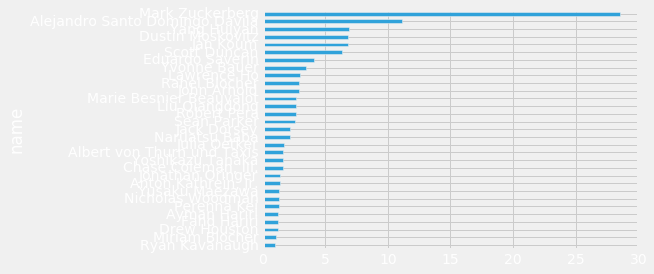

In [21]:
sorted_young_bils = recent[recent['age'] < 40].sort_values(by='networthusbillion')
sorted_young_bils.plot(kind='barh', x='name', y='networthusbillion', legend=False)

In [23]:
plt.style.use("fivethirtyeight")

In [22]:
plt.style.reload_library()